In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
!pip install pyarrow

  Obtaining dependency information for pyarrow from https://files.pythonhosted.org/packages/d4/f0/607f50ec87ac4775d6124855ae6be2c48bab58aa0a660ccd46e9af52bcd9/pyarrow-14.0.1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/24.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.6 MB 1.4 MB/s eta 0:00:18
   ---------------------------------------- 0.1/24.6 MB 1.4 MB/s eta 0:00:18
   ---------------------------------------- 0.1/24.6 MB 1.4 MB/s eta 0:00:18
   ---------------------------------------- 0.2/24.6 MB 748.1 kB/s eta 0:00:33
   ---------------------------------------- 0.2/24.6 MB 748.1 kB/s eta 0:00:33
   ---------------------------------------- 0.2/24.6 MB 748.1 kB/s eta 0:00:33
   ---------------------------------------- 0.2/24.6 MB 625.1 kB/s eta 0:00:39
   ---------------------------------------- 0.2/24.6 MB 625.1 kB/s eta 0:00:39
   ----------------------


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
sales_data = pd.read_feather(r'C:\Users\Saikat\Desktop\pandas\Projects\Sales Analysis for E-Commerce/Sales_data.ftr')

In [6]:
sales_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [7]:
sales_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [8]:
sales_data.dropna(how = "all", inplace = True)

In [9]:
sales_data.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [11]:
sales_data[sales_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [12]:
sales_data.drop_duplicates(inplace = True)

In [13]:
sales_data[sales_data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [16]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"


In [19]:
sales_data['Order Date'][0].split('/')[0]

'04'

In [20]:
def find_month(date):
    return date.split('/')[0]

In [23]:
sales_data['month'] = sales_data['Order Date'].apply(find_month)

In [30]:
filter = sales_data['month'] == 'Order Date'
sales_data = sales_data[~filter]

In [37]:
sales_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [40]:
sales_data['month'] = sales_data['month'].astype(int)
sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype(int)
sales_data['Price Each'] = sales_data['Price Each'].astype(float)

C:\Users\Saikat\AppData\Local\Temp\ipykernel_8396\346860287.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['month'] = sales_data['month'].astype(int)
C:\Users\Saikat\AppData\Local\Temp\ipykernel_8396\346860287.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Quantity Ordered'] = sales_data['Quantity Ordered'].astype(int)
C:\Users\Saikat\AppData\Local\Temp\ipykernel_8396\346860287.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


In [41]:
sales_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [42]:
sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

C:\Users\Saikat\AppData\Local\Temp\ipykernel_8396\288723227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['Sales'] = sales_data['Quantity Ordered'] * sales_data['Price Each']


<Axes: xlabel='month'>

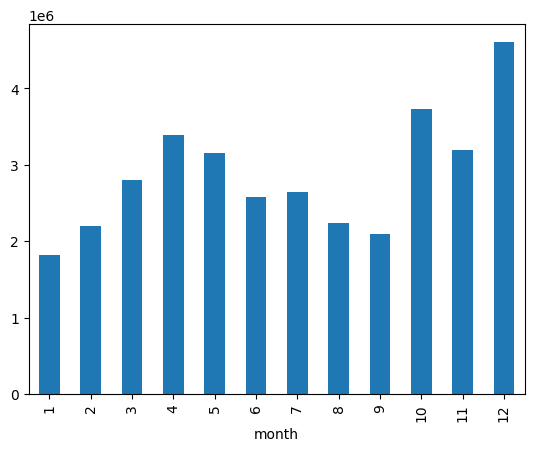

In [46]:
sales_data.groupby(['month'])['Sales'].sum().plot(kind = 'bar')

In [48]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99


In [51]:
sales_data['City'] = sales_data['Purchase Address'].str.split(',').str.get(1)

C:\Users\Saikat\AppData\Local\Temp\ipykernel_8396\4112939818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sales_data['City'] = sales_data['Purchase Address'].str.split(',').str.get(1)


In [57]:
Quantity_by_City = sales_data['City'].value_counts()

<Axes: ylabel='count'>

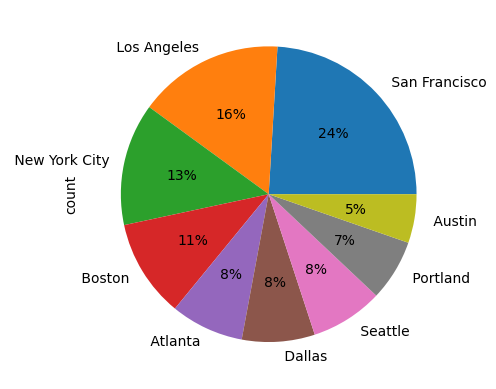

In [58]:
Quantity_by_City.plot(kind = 'pie', autopct = '%1.0f%%')

In [59]:
sales_data.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston


In [63]:
Product_by_Quantity = sales_data.groupby(['Product']).agg({'Quantity Ordered': 'sum', 'Price Each': 'mean'})

In [67]:
Product_by_Quantity.reset_index(inplace=True)

C:\Users\Saikat\AppData\Local\Temp\ipykernel_8396\3809352635.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axis1.set_xticklabels(Product_by_Quantity['Product'].values, rotation = 'vertical', fontsize = 10)


Text(0, 0.5, 'Average Price')

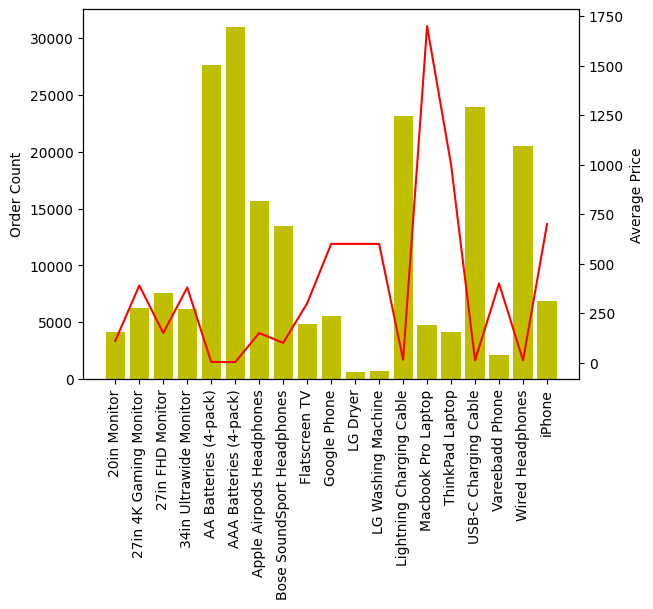

In [77]:
fig, axis1 = plt.subplots()
axis2 = axis1.twinx()
axis1.bar(Product_by_Quantity['Product'], Product_by_Quantity['Quantity Ordered'], color = 'y')
axis2.plot(Product_by_Quantity['Product'], Product_by_Quantity['Price Each'],color = 'r')
axis1.set_xticklabels(Product_by_Quantity['Product'].values, rotation = 'vertical', fontsize = 10)
axis1.set_ylabel('Order Count')
axis2.set_ylabel('Average Price')

In [83]:
Top_10 = sales_data['Product'].value_counts()[0:10]

In [89]:
Top_10_filter = Top_10.index

In [95]:
Top_10_df = sales_data[sales_data['Product'].isin(Top_10_filter)]

In [96]:
Top_10_df.head(2)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston


<Axes: xlabel='month'>

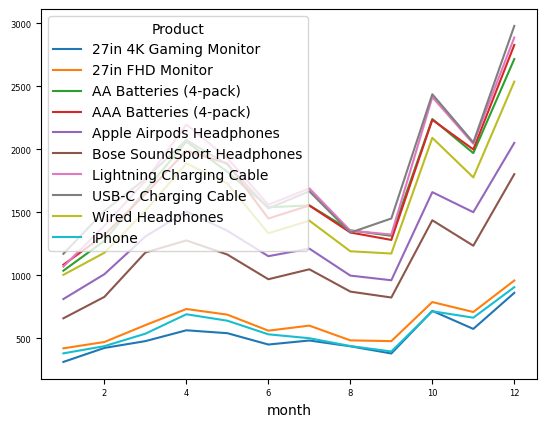

In [102]:
pd.crosstab(Top_10_df['month'],Top_10_df['Product']).plot(fontsize = 6)


<Axes: xlabel='month'>

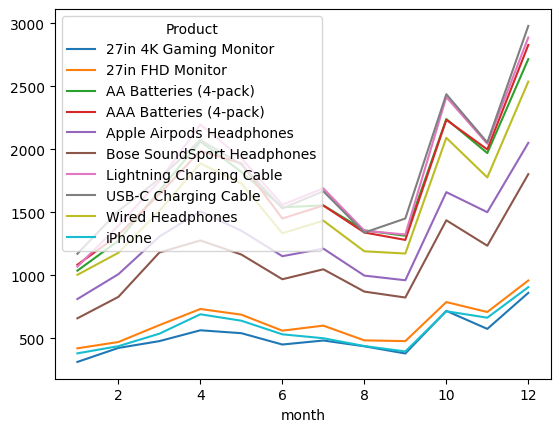

In [109]:
Top_10_df.groupby(['month', 'Product']).size().unstack().plot()

In [115]:
duplicated = sales_data[sales_data['Order ID'].duplicated(keep = False)]

In [122]:
dup_products = duplicated.groupby(['Order ID'])['Product'].apply(lambda x: ','.join(x)).reset_index().rename(columns = {'Product': 'Grouped_product'})

In [123]:
dup_products

,Order ID,Grouped_product
0,141275,"USB-C Charging Cable,Wired Headphones"
1,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
2,141365,"Vareebadd Phone,Wired Headphones"
3,141384,"Google Phone,USB-C Charging Cable"
4,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
6874,319536,"Macbook Pro Laptop,Wired Headphones"
6875,319556,"Google Phone,Wired Headphones"
6876,319584,"iPhone,Wired Headphones"
6877,319596,"iPhone,Lightning Charging Cable"


In [127]:
grouped_product_df = duplicated.merge(dup_products, how = 'left', on = 'Order ID')

In [129]:
no_dup_grouped_product = grouped_product_df.drop_duplicates(subset = 'Order ID')

<Axes: ylabel='count'>

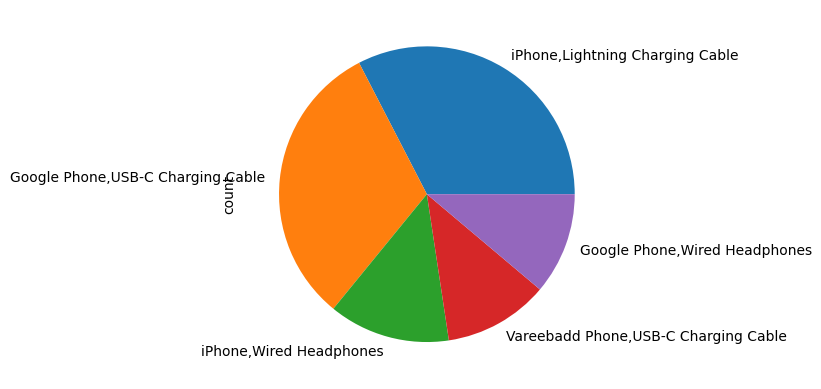

In [135]:
no_dup_grouped_product['Grouped_product'].value_counts()[0:5].plot(kind= 'pie')